In [1]:
#
# Install and Imports
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

/home/lrincon/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#
# Reading the Data
#
df = pd.read_csv(r"data/Fuel_Consumption_Ratings.csv")

In [3]:
#
# Exploratory Data Analysis
#
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


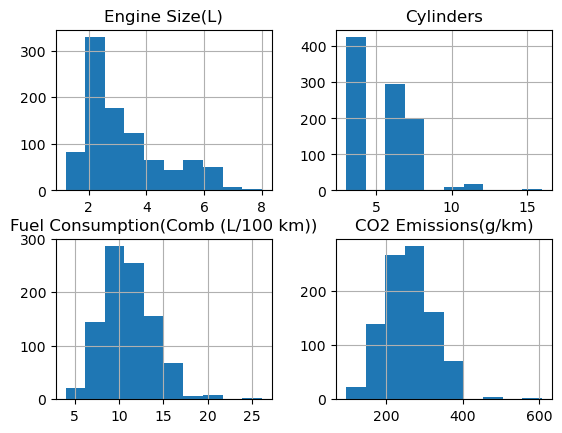

In [4]:
df.describe().T
df.isnull().any()
df_ = df[['Engine Size(L)','Cylinders','Fuel Consumption(Comb (L/100 km))', 'CO2 Emissions(g/km)']]
df_.head()
df_.hist()
plt.show()

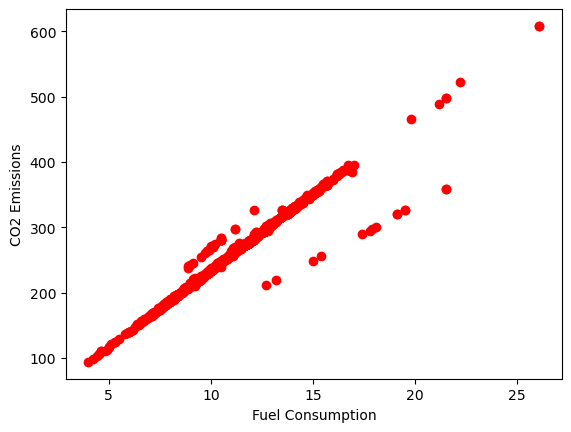

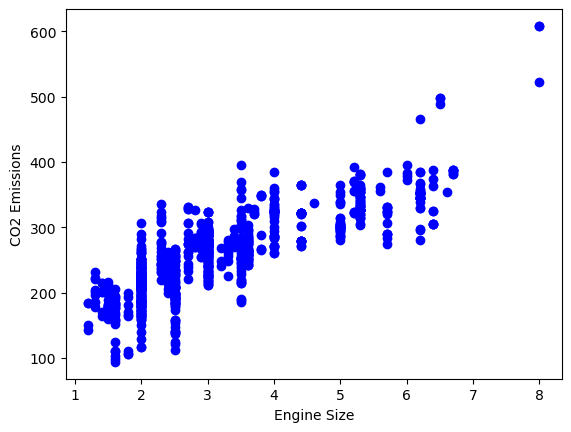

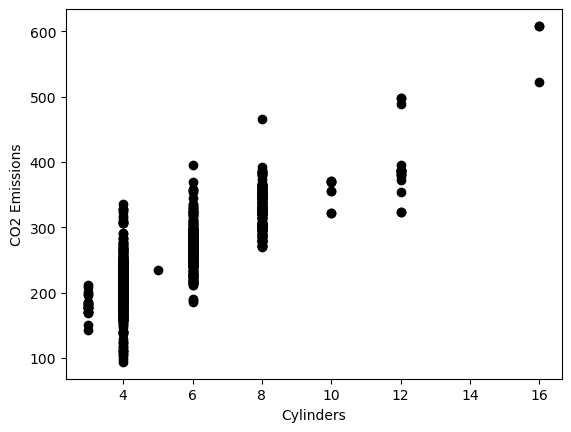

In [5]:
# Let’s plot each of these features
plt.scatter(df_['Fuel Consumption(Comb (L/100 km))'], df_['CO2 Emissions(g/km)'], color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.show()

plt.scatter(df_['Engine Size(L)'], df_['CO2 Emissions(g/km)'], color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

plt.scatter(df_['Cylinders'], df_['CO2 Emissions(g/km)'], color='black')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.show()


In [6]:
# Creating train and test dataset
X = df_[['Fuel Consumption(Comb (L/100 km))']]
y = df_[['CO2 Emissions(g/km)']]
print(y.shape)

(946, 1)


In [7]:
# We will use about 80 % of the entire dataset for training and 20 % for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(y_train.shape)
print(y_test.shape)

(756, 1)
(190, 1)


In [8]:
# Modelling
reg_model = LinearRegression().fit(X_train, y_train)

In [9]:
# Calculation of the coefficients
print ('Intercept: ',reg_model.intercept_)  
print ('Coefficients: ', reg_model.coef_[0])

Intercept:  [17.77773186]
Coefficients:  [21.7634623]


In [10]:
# Prediction
# How much CO2 Emissions would be expected with 26.10 units of Fuel Consumption?
reg_model.intercept_[0] + reg_model.coef_[0][0]*26.10

585.804097949718

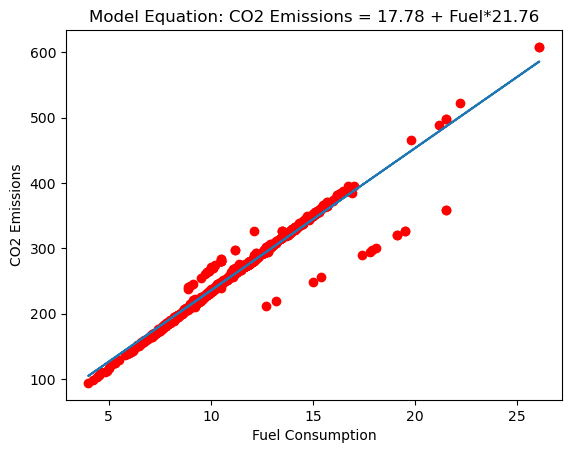

In [11]:
# Plot output
plt.scatter(df_['Fuel Consumption(Comb (L/100 km))'], df_['CO2 Emissions(g/km)'], color='red')
plt.plot(df_['Fuel Consumption(Comb (L/100 km))'], reg_model.intercept_[0] + reg_model.coef_[0][0]*df_['Fuel Consumption(Comb (L/100 km))'])
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.title(f'Model Equation: CO2 Emissions = {round(reg_model.intercept_[0], 2)} + Fuel*{round(reg_model.coef_[0][0], 2)}')
plt.show()

In [12]:
# Evaluation of the Model (train)
# Mean Squared Error (MSE)
y_pred = reg_model.predict(X_train)
print('MSE: ',mean_squared_error(y_train, y_pred))      
print(y_train.mean())                                   
print(y_train.std())                                   

MSE:  241.13693457290648
CO2 Emissions(g/km)    260.719577
dtype: float64
CO2 Emissions(g/km)    64.878557
dtype: float64


In [13]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(mean_squared_error(y_train, y_pred)))   

15.528584435579004


In [14]:
# Mean Absolute Error (MAE)
print(mean_absolute_error(y_train, y_pred))         

6.419529775552591


In [15]:
# R2 Score
print(reg_model.score(X_train, y_train))                

0.942636425005184


In [16]:
# Evaluation of the Model (test)
# Mean Squared Error (MSE)
y_pred = reg_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))      
print(y_test.mean())                                   
print(y_test.std()) 

MSE:  194.22913890297556
CO2 Emissions(g/km)    253.015789
dtype: float64
CO2 Emissions(g/km)    62.468233
dtype: float64


In [17]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

13.936611456985359


In [18]:
# Mean Absolute Error (MAE)
print(mean_absolute_error(y_test, y_pred))         

5.992849722263418


In [19]:
# 10-Fold Cross Validation and Obtaining RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

12.42103950462026

In [20]:
# Creating train and test dataset
X = df_[['Fuel Consumption(Comb (L/100 km))','Engine Size(L)','Cylinders']]
y = df_[['CO2 Emissions(g/km)']]
print(y.shape)

(946, 1)


In [21]:
# We will use about 80 % of the entire dataset for training and 20 % for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(y_train.shape)
print(y_test.shape)

(756, 1)
(190, 1)


In [22]:
# Modelling
reg_model = LinearRegression().fit(X_train, y_train)

In [23]:
# Calculation of the coefficients
print ('Intercept: ',reg_model.intercept_)  
print ('Coefficients: ', reg_model.coef_[0])

Intercept:  [20.52509352]
Coefficients:  [19.61155508  1.06444738  3.13512483]


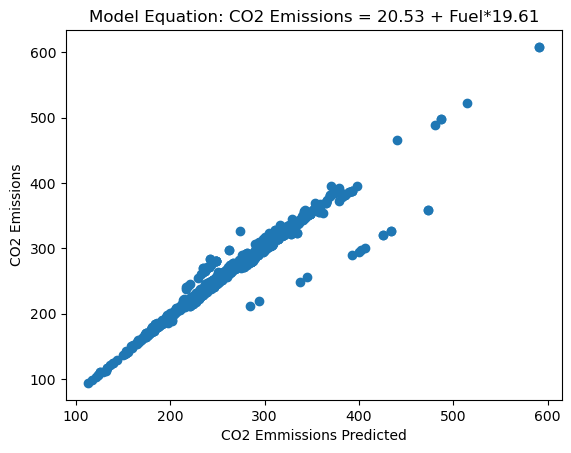

In [26]:
# Plot output
plt.scatter(reg_model.intercept_[0] + reg_model.coef_[0][0]*df_['Fuel Consumption(Comb (L/100 km))']+reg_model.coef_[0][1]*df_['Engine Size(L)']++reg_model.coef_[0][2]*df_['Cylinders'],df_['CO2 Emissions(g/km)'])
plt.xlabel("CO2 Emmissions Predicted")
plt.ylabel("CO2 Emissions")
plt.title(f'Model Equation: CO2 Emissions = {round(reg_model.intercept_[0], 2)} + Fuel*{round(reg_model.coef_[0][0], 2)}')
plt.show()

In [29]:
# Evaluation of the Model (train)
# Mean Squared Error (MSE)
y_pred = reg_model.predict(X_train)
print('MSE: ',mean_squared_error(y_train, y_pred))      
print(y_train.mean())                                   
print(y_train.std())                                   

MSE:  224.19342813744979
CO2 Emissions(g/km)    260.719577
dtype: float64
CO2 Emissions(g/km)    64.878557
dtype: float64


In [31]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(mean_squared_error(y_train, y_pred)))

14.973090133217317


In [32]:
# Mean Absolute Error (MAE)
print(mean_absolute_error(y_train, y_pred))  

6.975589358045902


In [33]:
# R2 Score
print(reg_model.score(X_train, y_train))       

0.9466670812951751
